In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Đọc dữ liệu từ file gold_clean.csv

In [29]:
df = pd.read_csv('gold_clean.csv', index_col=0)
df.head()


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


## Phân tích giá mở cửa từ năm 2000 đến năm 2022

C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\2191094359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open['Date'] = open['Date'].str[:4]


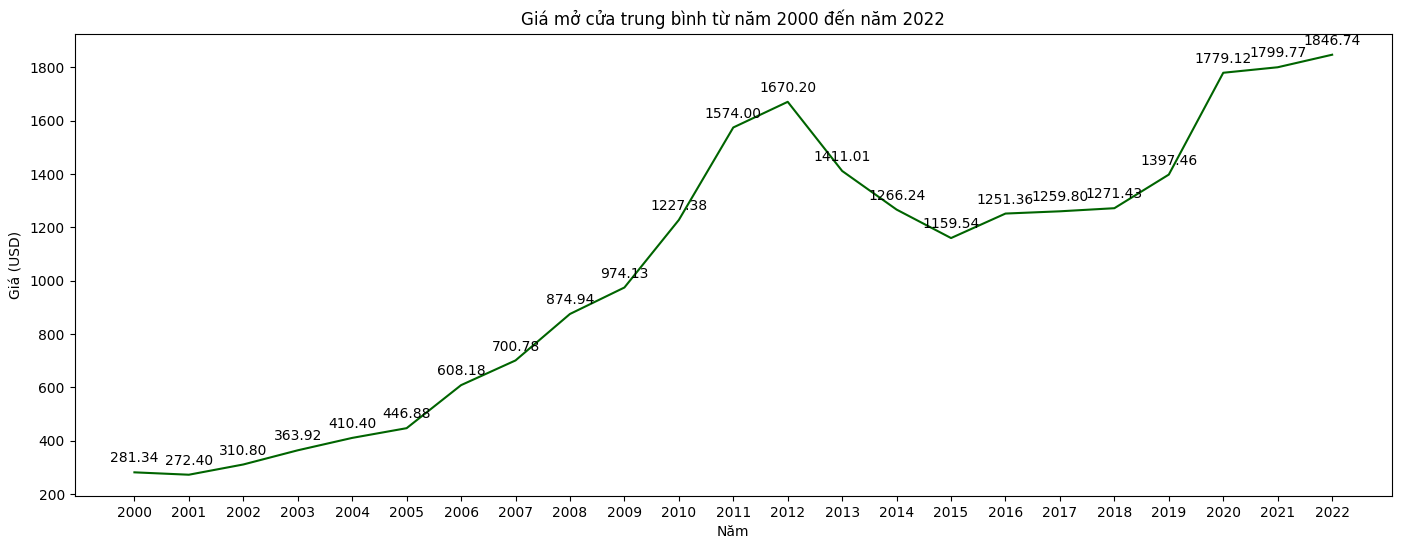

In [30]:
# Tính giá vàng mở cửa trung bình theo từng năm
open=df[['Date', 'Open']]
open['Date'] = open['Date'].str[:4]
open_by_year = open.groupby(by = 'Date', axis=0, as_index=False).mean()

# Trực quan bằng biểu đồ đường để thấy sự thay đổi theo từng năm
plt.figure(figsize=(17,6))
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen')
plt.xlabel("Năm")
plt.ylabel("Giá (USD)")
plt.title("Giá mở cửa trung bình từ năm 2000 đến năm 2022")
for x,y in zip(open_by_year['Date'], open_by_year['Open']):
    
    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,10), 
                 ha='center')
plt.show()

- Nhìn chung, giá vàng mở cửa trung bình có xu hướng tăng qua từng năm, nhưng tăng không đồng đều.
- Giá vàng mở cửa trung cao nhất ở năm 2022 (1846.74 USD), thấp nhất năm 2001 (272.40 USD)
- Giá vàng mở cửa trung bình tăng đều từ năm 2001 đến năm 2012, sau đó đến năm 2015 giảm dần, và tăng đều trở lại từ năm 2016 đến năm 2022.
- Giá vàng mở cửa trung bình tăng mạnh nhất là năm 2020 (tăng 381.66 USD so với năm 2019) và giảm mạnh nhất là năm 2013 (giảm 259.19 USD so với năm 2012)

## Phân tích số lượng giao dịch trung bình theo từng năm

C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\874099926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol['Date'] = vol['Date'].str[:4]


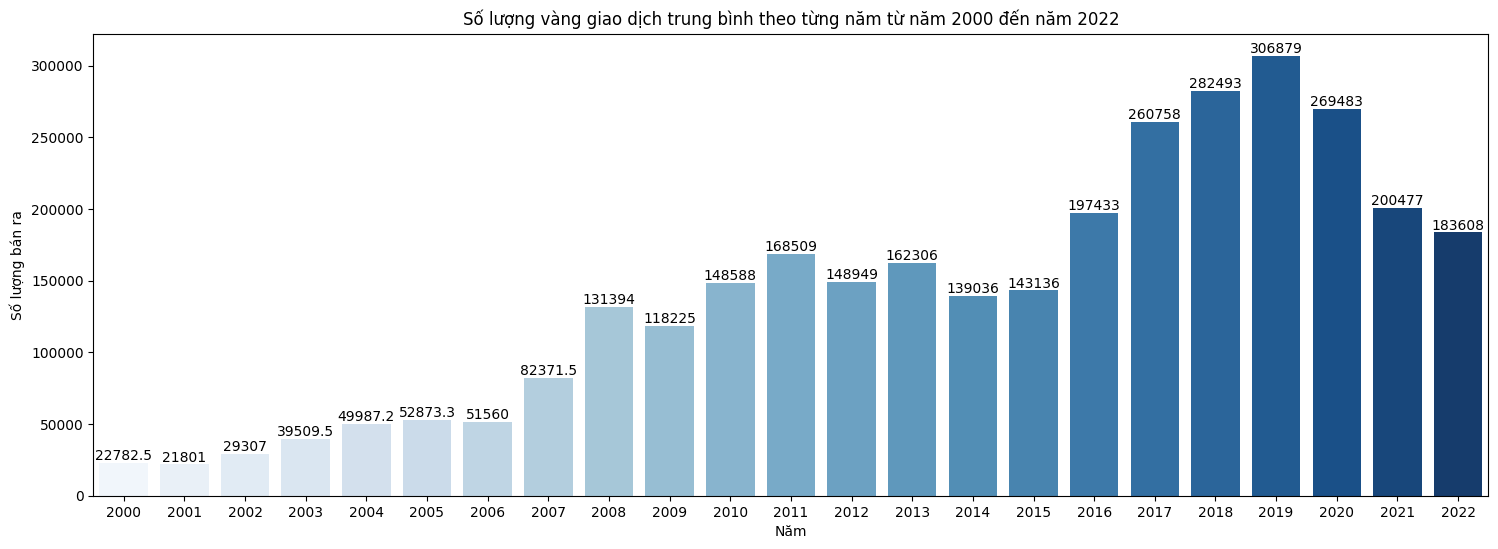

In [31]:
# Tính số lượng trung bình bán ra theo từng năm
vol=df[['Date', 'Volume']]
vol['Date'] = vol['Date'].str[:4]
vol_by_year = vol.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year

# Trực quan bằng biểu đồ cột đứng để thấy sự thay đổi theo từng năm
plt.figure(figsize=(18,6))
bp = sns.barplot(x='Date', y='Volume', data=vol_by_year, palette='Blues')
plt.bar_label(bp.containers[0], label_type='edge')
plt.xlabel("Năm")
plt.ylabel("Số lượng bán ra")
plt.title("Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022")
plt.show()

- Nhìn chung, số lượng giao dịch vàng trung bình có xu hướng tăng qua từng năm, nhưng tăng không đồng đều.
- Số lượng giao dịch vàng trung bình cao nhất ở năm 2019 (306879 giao dịch), thấp nhất năm 2001 (21801 giao dịch)
- Số lượng giao dịch vàng trung bình tăng mạnh nhất là năm 2017 (tăng 63325 giao dịch so với năm 2016) và giảm mạnh nhất là năm 2021 (giảm 69006 giao dịch so với năm 2020)
- 3 năm gần nhất có xu hướng giảm có thể do những ảnh hưởng không tốt từ thị trường tác động tới việc giao dịch vàng.

##### Sự tăng giảm số lượng giao dịch theo từng năm

In [32]:
vol2=df[['Date', 'Volume']]
vol2['Date'] = vol2['Date'].str[:4]
vol_by_year2 = vol2.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year2

# Tính sự tăng giảm số lượng giao dịch và phần trăm
vol_by_year2['Change'] = vol_by_year2['Volume'] - vol_by_year2['Volume'].shift(1)
vol_by_year2.iloc[0, 2] = 0

vol_by_year2['PercentChange'] = (vol_by_year2['Change'].div(vol_by_year2['Volume'].shift(1))).multiply(100)
vol_by_year2.iloc[0, 3] = 0
vol_by_year2['PercentChange'] = vol_by_year2['PercentChange'].round(decimals=2)


C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\3207853905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol2['Date'] = vol2['Date'].str[:4]


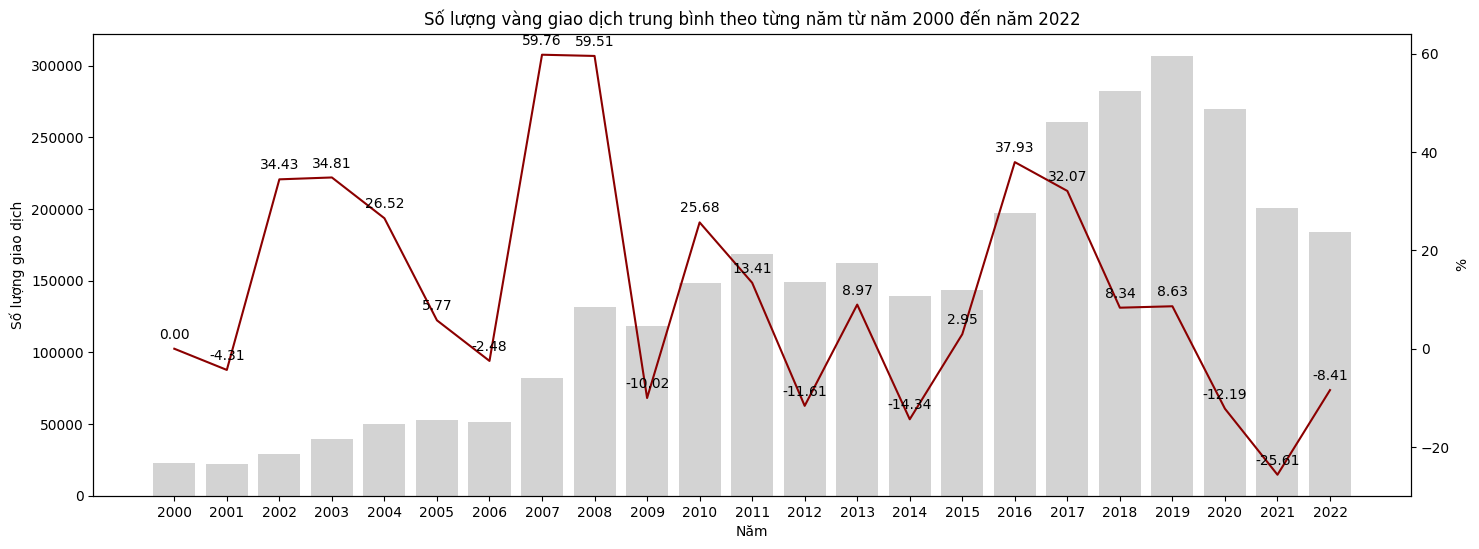

In [33]:
fig, plot01 = plt.subplots(figsize=(17,6))
plot02 = plot01.twinx()

ax = sns.barplot(x='Date', y='Volume', data=vol_by_year, ax=plot01, color='lightgrey')
# plot01.bar_label(ax.containers[0])

sns.lineplot(x='Date', y='PercentChange', data=vol_by_year2, ax=plot02, color='darkred')
for x,y in zip(vol_by_year2['Date'], vol_by_year2['PercentChange']):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset pixels", 
                 xytext=(0,10), 
                 ha='center')   

plot01.set_xlabel('Năm')
plot01.set_ylabel('Số lượng giao dịch')
plot02.set_ylabel('%')

plt.title("Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022")
plt.show()

- Năm 2007 có tỉ lệ tăng cao nhất (tăng 59.76% so với năm trước), năm 2021 có tỉ lệ giảm cao nhất (giảm 25,61% so với năm trước)

## Tìm mối tương quan giữa giá mở cửa và số lượng giao dịch

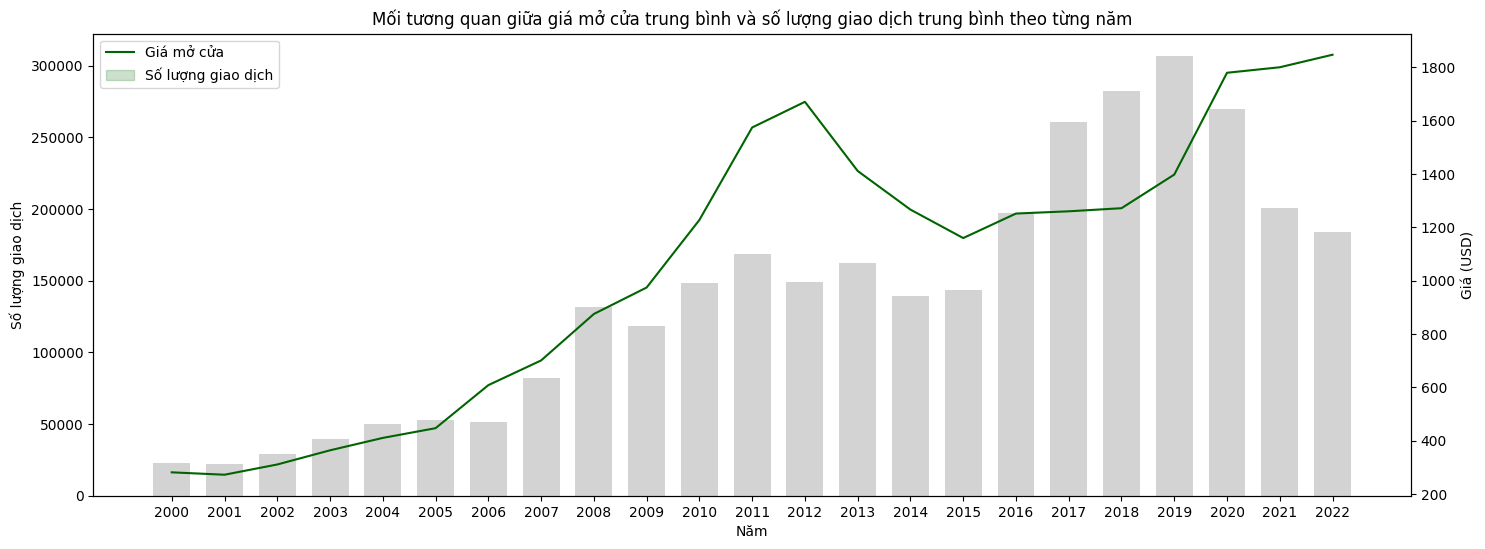

In [34]:
#Tạo biểu đồ
fig, plot1 = plt.subplots(figsize=(17,6))
plot2 = plot1.twinx()

sns.barplot(x='Date', y='Volume', data=vol_by_year, color='lightgrey', ax=plot1, label='Số lượng giao dịch', width=0.7)
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen', ax=plot2, label='Giá mở cửa')

# Chỉnh sửa biểu đồ
plot1.set_xlabel("Năm")
plot1.set_ylabel("Số lượng giao dịch")
plot2.set_ylabel("Giá (USD)")
plt.title("Mối tương quan giữa giá mở cửa trung bình và số lượng giao dịch trung bình theo từng năm")
plt.legend(['Giá mở cửa', 'Số lượng giao dịch'])
plt.show()

- Từ năm 2000 đến năm 2010, mức giá mở cửa tăng và số giao dịch vàng theo năm tỉ lệ thuận.
- Trong giai đoạn 2010 - 2012, mức giá mở cửa có tăng nhanh chóng nhưng số giao dịch theo năm vẫn giữ mức ổn định, không tăng quá nhiều và cũng không giảm quá nhiều.
- Số lượng giao dịch tăng đều ở giai đoạn 2014 - 2019, giai đoạn này mức giá mở cửa ở mức ổn định và không tăng quá nhiều. 
- 3 năm gần nhất có xu hướng giảm và giảm mạnh nhất vào năm 2021. Nhận thấy rằng ở năm 2020 mức giá mở cửa tăng mạnh và có xu hướng không giảm, cộng thêm đó là dịch bệnh COVID-19 diễn ra làm các hoạt động kinh tế bị trì trệ, mức độ tiêu thụ hàng hoá bị giảm và vàng không là ngoại lệ.

##### Sử dụng Linear Regression để thể hiện mối tương quan

In [35]:
vol_by_year2['Volume'].corr(open_by_year['Open'])

0.8211786268508551

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = open_by_year['Open'].values
model = LinearRegression()
model.fit(X.reshape(-1,1), vol_by_year2['Volume'].values)

y = model.predict(X.reshape(-1,1))

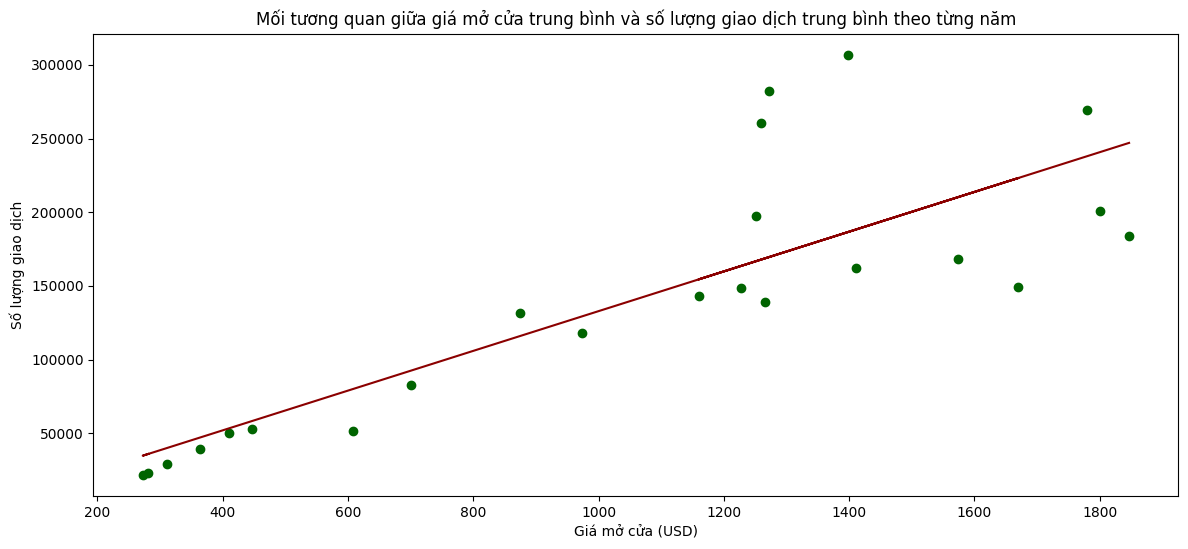

In [38]:
# Vẽ biểu đồ
plt.figure(figsize=(14,6))
plt.scatter(open_by_year['Open'], vol_by_year2['Volume'], color='darkgreen')
plt.plot(X, y, color='darkred')
plt.xlabel('Giá mở cửa (USD)')
plt.ylabel('Số lượng giao dịch')
plt.title('Mối tương quan giữa giá mở cửa trung bình và số lượng giao dịch trung bình theo từng năm')
plt.show()

## Xem số lượng giao dịch theo từng tháng trong năm

In [39]:
by_month = df[['Date', 'Volume']]

by_month['Date'] = by_month['Date'].str[:7]
by_month['Year'] = by_month['Date'].str[:4]
by_month['Month'] = by_month['Date'].str[-2:]

by_month_avg = by_month.groupby(by = ['Year', 'Month'], axis=0, as_index=False).mean()
by_month_avg['Volume'] = by_month_avg['Volume'].round(decimals=0)


C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\1248288964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_month['Date'] = by_month['Date'].str[:7]
C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\1248288964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_month['Year'] = by_month['Date'].str[:4]
C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\1248288964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [40]:
pvt = by_month_avg.pivot('Month', 'Year', 'Volume')
pvt

C:\Users\yukih\AppData\Local\Temp\ipykernel_18476\2612243238.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pvt = by_month_avg.pivot('Month', 'Year', 'Volume')


Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,,,,,,
01,21791.0,23250.0,25580.0,40246.0,63003.0,57411.0,75508.0,70321.0,148654.0,121081.0,...,158974.0,139585.0,182162.0,170195.0,242704.0,359532.0,238146.0,381458.0,257545.0,216644.0
02,37130.0,23545.0,29595.0,44439.0,45126.0,43430.0,56591.0,70497.0,120288.0,118593.0,...,174169.0,126357.0,125564.0,204148.0,219448.0,302755.0,204052.0,390870.0,228051.0,205159.0
03,23952.0,26159.0,22963.0,36071.0,52882.0,53474.0,67676.0,73597.0,159699.0,119856.0,...,146884.0,160662.0,155536.0,208448.0,221046.0,298592.0,259121.0,385086.0,220888.0,212211.0
04,17526.0,17631.0,24307.0,29328.0,53349.0,38991.0,60881.0,65139.0,116331.0,78476.0,...,219497.0,118548.0,136472.0,174177.0,233099.0,303582.0,233390.0,188703.0,163497.0,157648.0
05,21599.0,31299.0,35339.0,40442.0,49304.0,52003.0,74817.0,79768.0,125785.0,102303.0,...,196964.0,137236.0,147395.0,220299.0,244189.0,333801.0,269084.0,202778.0,248928.0,182328.0
06,26880.0,20817.0,33536.0,36110.0,41199.0,53228.0,47589.0,66525.0,117799.0,95001.0,...,174253.0,113219.0,122934.0,206263.0,212264.0,261169.0,351257.0,188619.0,206343.0,158662.0
07,19456.0,20661.0,35393.0,37836.0,51732.0,53996.0,52549.0,79158.0,153650.0,95877.0,...,167240.0,139671.0,163805.0,230702.0,242526.0,278254.0,368691.0,264276.0,208273.0,201482.0
08,14938.0,22153.0,24023.0,35327.0,39939.0,50251.0,32206.0,66099.0,132047.0,76910.0,...,146357.0,104333.0,151630.0,173237.0,284813.0,262456.0,410872.0,341895.0,166491.0,138800.0
09,19361.0,18093.0,29290.0,43417.0,41953.0,61231.0,37694.0,94239.0,181178.0,123825.0,...,155581.0,141244.0,127046.0,174289.0,331118.0,275991.0,408078.0,282038.0,173948.0,198618.0


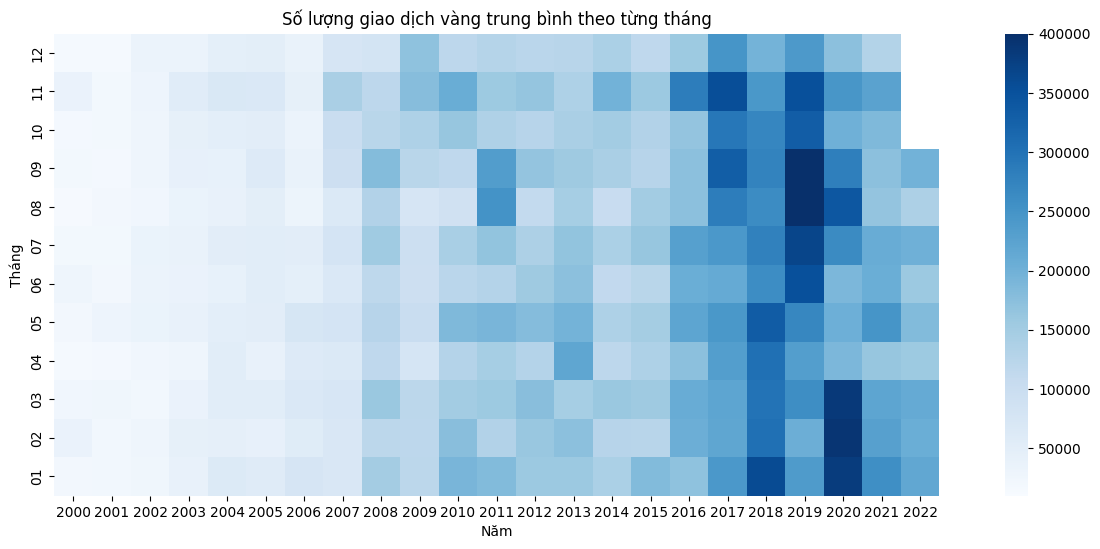

In [41]:
# Vẽ biểu đồ
plt.figure(figsize=(17,6))
hm = sns.heatmap(pvt, square=True, vmin=10000, vmax=400000, cmap='Blues')
hm.set(xlabel='Năm', ylabel='Tháng', title='Số lượng giao dịch vàng trung bình theo từng tháng')

hm.invert_yaxis() # Đảo chiều thanh đứng lại hiển thị từ dưới lên từ tháng 1 đến tháng 12
plt.show()


- Nhìn chung, số lượng giao dịch sẽ tập trung nhiều nhất vào 3 tháng đầu năm (tháng 1, tháng 2, tháng 3) và 3 tháng cuối năm (tháng 10, tháng 11, tháng 12)
- Số lượng giao dịch được ghi nhận nhiều nhất vào 3 tháng đầu năm 2020 và tháng 8, tháng 9 năm 2019.